In [1]:
import pandas as pd
import matplotlib.pyplot as pp
import numpy as np

In [2]:
data_frame_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
data_frame_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
data_frame_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [3]:
melted_result_confirmed = pd.melt(data_frame_confirmed, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Confirmed')
melted_result_deaths = pd.melt(data_frame_deaths, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Deaths')
melted_result_recovered = pd.melt(data_frame_recovered, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Recovered')

melted_result_confirmed['Date'] = pd.to_datetime(melted_result_confirmed['Date']).dt.date
melted_result_deaths['Date'] = pd.to_datetime(melted_result_deaths['Date']).dt.date
melted_result_recovered['Date'] = pd.to_datetime(melted_result_recovered['Date']).dt.date

melted_result_confirmed

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2
1,NaN,Japan,36.0000,138.0000,2020-01-22,2
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0
...,...,...,...,...,...,...
25460,NaN,Somalia,5.1521,46.1996,2020-03-16,1
25461,NaN,Tanzania,-6.3690,34.8888,2020-03-16,1
25462,NaN,The Bahamas,24.2500,-76.0000,2020-03-16,1
25463,Virgin Islands,US,18.3358,-64.8963,2020-03-16,1


In [4]:
def get_from_day_0(country, days):
    counter_aux = 0
    for key, value in country.iterrows():
        if value['Confirmed'] != 0:
            country.at[key, "Days"] = counter_aux
            counter_aux = counter_aux + 1
            
    country = country[(country["Days"] >= 0)]
    
    if days != 0:
        country = country[:days]
    
    return country

In [5]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
def make_the_day_0_plot(country_1, country_2):
    ax = pp.gca()
    country_1.plot(kind = 'line', x = 'Days', y = 'Confirmed', label = 'Confirmed cases in ' + country_1['Country/Region'].iloc[0], ax=ax)
    country_2.plot(kind = 'line', x = 'Days', y = 'Confirmed', label = 'Confirmed cases in ' + country_2['Country/Region'].iloc[0], ax=ax)
    pp.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=3)

In [6]:
melted_result_confirmed["Days"] = -1
melted_result_confirmed = melted_result_confirmed.sort_values(['Country/Region', 'Province/State', 'Date'])

country_1 = get_from_day_0(melted_result_confirmed.loc[melted_result_confirmed['Country/Region'] == 'Argentina'], 7)
country_2 = get_from_day_0(melted_result_confirmed.loc[melted_result_confirmed['Country/Region'] == 'Spain'], 7)

In [7]:
country_1

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Days
19049,NaN,Argentina,-38.4161,-63.6167,2020-03-03,1,0
19512,NaN,Argentina,-38.4161,-63.6167,2020-03-04,1,1
19975,NaN,Argentina,-38.4161,-63.6167,2020-03-05,1,2
20438,NaN,Argentina,-38.4161,-63.6167,2020-03-06,2,3
20901,NaN,Argentina,-38.4161,-63.6167,2020-03-07,8,4
21364,NaN,Argentina,-38.4161,-63.6167,2020-03-08,12,5
21827,NaN,Argentina,-38.4161,-63.6167,2020-03-09,12,6


In [8]:
country_2

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Days
4648,NaN,Spain,40.0,-4.0,2020-02-01,1,0
5111,NaN,Spain,40.0,-4.0,2020-02-02,1,1
5574,NaN,Spain,40.0,-4.0,2020-02-03,1,2
6037,NaN,Spain,40.0,-4.0,2020-02-04,1,3
6500,NaN,Spain,40.0,-4.0,2020-02-05,1,4
6963,NaN,Spain,40.0,-4.0,2020-02-06,1,5
7426,NaN,Spain,40.0,-4.0,2020-02-07,1,6


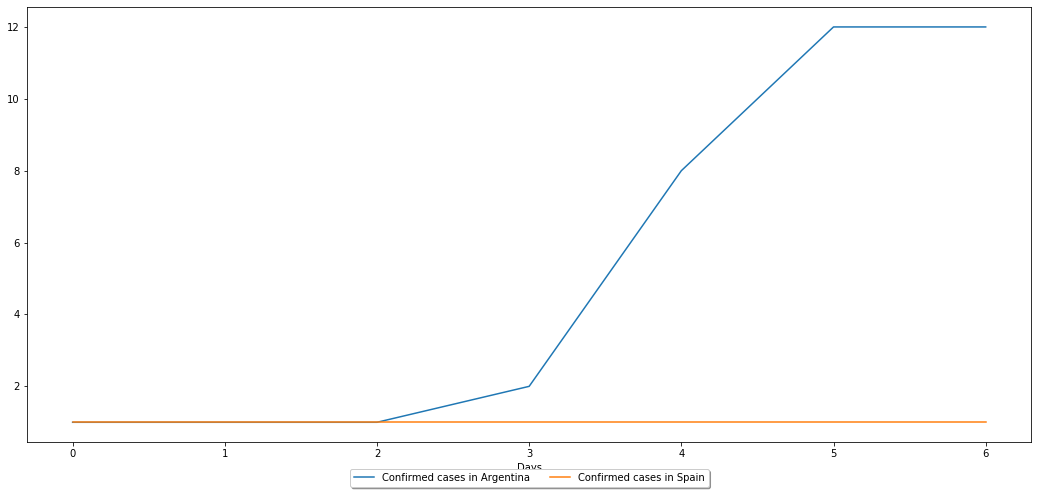

In [9]:
pp.figure(figsize = (18, 8))
make_the_day_0_plot(country_1, country_2)